# Fundamentos de la Programación (Grado en Ingeniería de la Salud)
## Ejercicio "Medallas olímpicas" (18 de enero de 2018)

Antes de empezar, ejecutaremos la siguiente celda con las importaciones necesarias para poder realizar el ejercicio:

In [1]:
import csv
from matplotlib import pyplot as plt
from collections import namedtuple, Counter

## 1. Carga de datos (0.75 puntos)

Tomaremos los datos de un fichero de entrada llamado <code>medals.csv</code> en el que se encuentran registradas las medallas obtenidas a lo largo de la historia de las Olimpiadas. El fichero se encuentra en la carpeta <code>./data</code>. Cada línea del fichero de entrada contiene las siguientes informaciones:

- **Name:** nombre del deportista
- **Sexo:** sexo del deportista (<code>M</code> o <code>F</code>)
- **Age:** edad del deportista
- **Year:** año de la correspondiente olimpiada
- **Sport:** disciplina deportiva
- **Medal:** tipo de medalla (<code>Gold</code>, <code>Silver</code> o <code>Bronze</code>)

He aquí un fragmento con las primeras líneas del fichero de entrada:
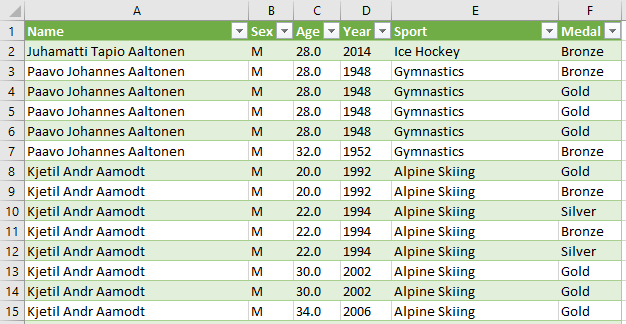
La primera función que implementaremos será la de lectura. Será la encargada de leer los datos del fichero de entrada y cargarlos en una lista de tuplas:

In [2]:
Medalla = namedtuple('Medalla', 'deportista sexo edad año deporte tipo')

def lee_medallas(fichero):
    ''' Lee el fichero de entrada y devuelve una lista de registros
    
    ENTRADA:
       - fichero: nombre del fichero de entrada
    SALIDA:
       - lista de registros -> [Medalla(str, str, float, int, str, str)]

    Hay que transformar ciertos elementos de la entrada en valores numéricos
    para que puedan ser procesados posteriormente.
    '''
    registros = []
    with open(fichero, 'r', encoding='utf-8') as f:
        lector = csv.reader(f)
        registros = [Medalla(deportista, sexo, float(edad), int(año), deporte, tipo)
                    for deportista, sexo, edad, año, deporte, tipo in lector]
    return registros

In [3]:
# Test de la función lee_medallas
REGISTROS = lee_medallas('./data/medals.csv')

# La salida esperada de la siguiente instrucción es: 
#    30181 [Medalla(deportista='Juhamatti Tapio Aaltonen', sexo='M', edad=28.0, año=2014, deporte='Ice Hockey', tipo='Bronze'), 
#    Medalla(deportista='Paavo Johannes Aaltonen', sexo='M', edad=28.0, año=1948, deporte='Gymnastics', tipo='Bronze')] 
print(len(REGISTROS), REGISTROS[:2])

30181 [Medalla(deportista='Juhamatti Tapio Aaltonen', sexo='M', edad=28.0, año=2014, deporte='Ice Hockey', tipo='Bronze'), Medalla(deportista='Paavo Johannes Aaltonen', sexo='M', edad=28.0, año=1948, deporte='Gymnastics', tipo='Bronze')]


## 2. Consulta y filtrado (7.25 puntos)

Una vez que hemos cargado los datos en una estructura en memoria ya podemos empezar a procesarlos. En esta sección implementaremos algunas funciones de consulta y filtrado que nos permitirán trabajar con ellos.

La primera función que implementaremos se llama <code>proporciones_por_sexo</code>. La función toma una lista de tuplas de registros y calcula qué proporción de medallas hay por cada sexo:

In [4]:
def proporciones_por_sexo(registros):
    ''' Proporción de medallas por cada sexo
    
    ENTRADA:
       - registros: lista de registros -> [Medalla(str, str, float, int, str, str)]
    SALIDA:
       - proporción de medallas de hombres -> float
       - proporción de medallas de mujeres -> float
    '''
    total = len([r for r in registros])
    hombres = len([r for r in registros if r.sexo=='M'])
    return hombres/total, (total-hombres)/total

In [5]:
# Test de la función proporciones_por_sexo
prop_M, prop_F = proporciones_por_sexo(REGISTROS)

# La salida esperada de la siguiente instrucción es: 
#   0.6570690169311819 0.34293098306881814
print(prop_M, prop_F)

0.6570690169311819 0.34293098306881814


La segunda función se llama <code>calcula_deportistas_oro</code>. Toma una lista de registros y produce como salida un conjunto con los nombres de los deportistas que tienen, al menos, un medalla de oro:


In [6]:
def calcula_deportistas_oro(registros):
    ''' Calcula los deportistas que tienen medalla de oro
    
    ENTRADA:
       - registros: lista de registros -> [Medalla(str, str, float, int, str, str)]
    SALIDA:
       - conjunto de deportistas con medalla de oro -> {str}
    '''
    return {r.deportista for r in registros if r.tipo=='Gold'}

In [7]:
# Test de la función calcula_deportistas_oro
deportistas = calcula_deportistas_oro(REGISTROS)

# La salida esperada de la siguiente instrucción es: 
#    7741 ['Aagje "Ada" Kok (-van der Linden)', 'Aaron Nigel Armstrong', 'Aaron Wells Peirsol', 'Aavo Pikkuus', 'Abas Arslanagi']
print(len(deportistas), sorted(deportistas)[:5])

7741 ['Aagje "Ada" Kok (-van der Linden)', 'Aaron Nigel Armstrong', 'Aaron Wells Peirsol', 'Aavo Pikkuus', 'Abas Arslanagi']


La siguiente función se llama <code>filtra_por_deporte_y_año</code>. Toma una lista de registros, una lista de deportes y una lista de años, y selecciona solo los registros de los deportes y en los años indicados:

In [8]:
def filtra_por_deporte_y_año(registros, deportes, años):
    ''' Selecciona registros por deportes y años
    
    ENTRADA:
       - registros: lista de registros -> [Medalla(str, str, float, int, str, str)]
       - deportes: lista de deportes a seleccionar -> [str]
       - años: lista de años a seleccionar -> [int]
    SALIDA:
       - lista de registros de los deportes y años indicados -> [Medalla(str, str, float, int, str, str)]
    '''
    filtrados = [r for r in registros if r.deporte in deportes and r.año in años]
    return filtrados

In [9]:
# Test de la función filtra_por_deporte_y_año
deportes = ['Gymnastics', 'Athletics', 'Sailing']
años = [2008, 2012, 2016] 
filtrados = filtra_por_deporte_y_año(REGISTROS, deportes, años)

# La salida esperada de la siguiente instrucción es: 
# 909 [Medalla(deportista='Mariya Vasilyevna Abakumova (-Tarabina)', sexo='F', edad=22.0, año=2008, deporte='Athletics', tipo='Silver'), 
#      Medalla(deportista='Elvan Abeylegesse', sexo='F', edad=25.0, año=2008, deporte='Athletics', tipo='Silver')]
print(len(sorted(filtrados)), filtrados[:2])

909 [Medalla(deportista='Mariya Vasilyevna Abakumova (-Tarabina)', sexo='F', edad=22.0, año=2008, deporte='Athletics', tipo='Silver'), Medalla(deportista='Elvan Abeylegesse', sexo='F', edad=25.0, año=2008, deporte='Athletics', tipo='Silver')]


La siguiente función de esta sección se llama <code>medallistas_por_deporte</code>. Toma como entrada una lista de registros, y produce como salida un diccionario cuyas claves son los distintos deportes, y los valores son el número de medallistas distintos para cada deporte.

In [10]:
def medallistas_por_deporte(registros):
    ''' Crea un diccionario con el número de medallistas por cada deporte
    
    ENTRADA:
       - registros: lista de registros -> [Medalla(str, str, float, int, str, str)]
    SALIDA:
       - diccionario con el número de medallistas por deporte -> {str: int}
    '''
    numero_medallistas = dict()
    deportes = {r.deporte for r in registros}
    for deporte in deportes:
        deportistas = {r.deportista for r in registros if r.deporte == deporte}
        numero_medallistas[deporte] = len(deportistas)
    return numero_medallistas

In [11]:
# Test de la función medallistas_por_deporte
medallistas = medallistas_por_deporte(REGISTROS)

# La salida esperada de las siguientes instrucciones es: 
#   Athletics             2568
#   Rowing                1603
#   Swimming              1255
#   Ice Hockey             977
#   Football               969
deportes = sorted(medallistas, key=medallistas.get, reverse=True)
for deporte in deportes[:5]:
    print('{:20} {:5d}'.format(deporte, medallistas[deporte]))

Athletics             2568
Rowing                1603
Swimming              1255
Ice Hockey             977
Football               969


## 3. Visualización (2 puntos)

La función de visualización que implementaremos será <code>evolucion_medallas_femeninas</code>. Toma como entrada una lista de registros y genera una curva en la que se muestra el número de medallas femeninas en las distintas olimpiadas incluidas en los regsitros. 

In [21]:
def evolucion_medallas_femeninas(registros, solo_verano=True):
    ''' Genera una curva con la evolución de medallas femeninas
        
        ENTRADA:
           - registros: lista de registros -> [Medalla(str, str, float, int, str, str)]
           - solo_verano: valor booleano que, si es cierto, solo se muestran los datos de las
                          olimpiadas de verano (múltiplos de 4)
        SALIDA EN PANTALLA:
           - curva con la evolución de medallas femeninas
           
        Se usarán las siguientes instrucciones matplotlib para generar la curva:
            plt.figure(figsize=(10,5))
            plt.plot(medallas)
            plt.xticks(range(len(años)), años, rotation=80, fontsize=10)
            plt.ylabel('número de medallas') 
            plt.show()
        Donde las dos variables usadas significan lo siguiente:
            - años: lista de años de las olimpiadas, ordenados de menor a mayor
            - medallas: lista (alineada con la anterior) con el número de medallas femeninas de cada olimpiada 
    '''
    años = sorted({r.año for r in registros})
    if solo_verano:
        años = [año for año in años if año%4==0]
    medallas_año = Counter([r.año for r in registros if r.sexo=='F'])
    medallas = [medallas_año[año] for año in años]

    plt.figure(figsize=(10,5))
    plt.plot(medallas)
    plt.xticks(range(len(años)), años, rotation=80, fontsize=10)
    plt.ylabel('número de medallas')
    plt.show()

Las salidas de las dos siguientes celdas de test deberían ser las siguientes:
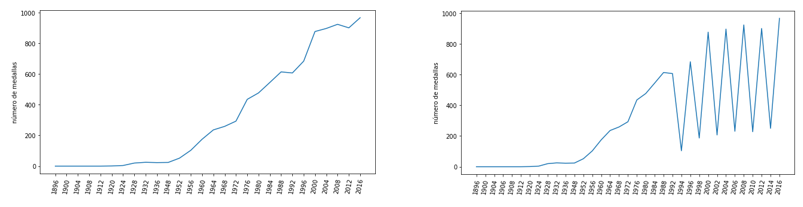

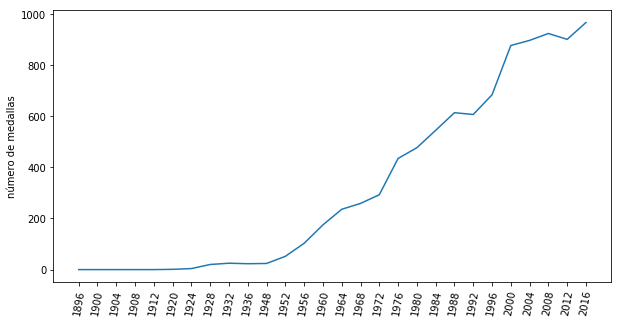

In [22]:
# Test de la función evolucion_medallas_femeninas para las olimpiadas de verano
evolucion_medallas_femeninas(REGISTROS)

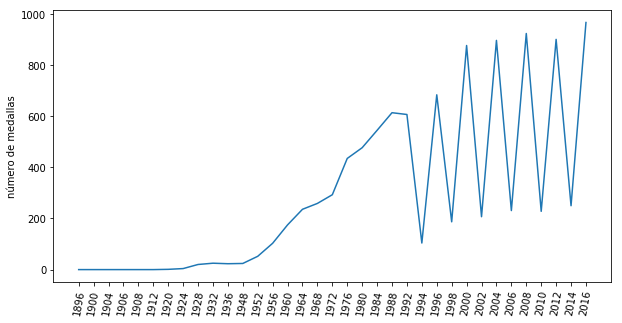

In [24]:
# Test de la función evolucion_medallas_femeninas para todas las olimpiadas
evolucion_medallas_femeninas(REGISTROS, solo_verano=False)